# Classical Statistical Tests: Hypothesis Testing

## Introduction

##### Hypothesis
> a statement about parameters of a population

Examples:
- is the mean value consistent with zero?
- is the random variable normally distributed?

##### Null ($H_0$) hypothesis and alternative ($H_1$) hypothesis
> two complementary hypotheses - a hypothesis test, points at one of them

##### Hypothesis testing
> to decide whether a hypothesis is *true* or *not*, based on a sample of the population

##### Test statistic
> Quantity which is constrained for a given hypothesis test and confidence level

### Null and alternative hypotheses
Usually, we use *null* to denote the simplest hypothesis. E.g. when testing if the there is a peak in a signal, the null hypothesis is:

> $H_0$: there is no peak - the data are explained as random fluctuations.

The alternative hypothesis is the one for which we require overwhelming evidence. For example, when testing the General Relativity through Gravitational Wave observations, then

> $H_0$: the data is consistent with GR

> $H_1$: the data is not consistent with GR

Most tests are designed to directly test whether $H_0$ holds. Also, in Statistics we want to highlight the fact that there is an uncertainty in any hypothesis test - we must be careful when stating results. Therefore, the two outcomes are commonly phrased as:

1. **we do not reject $H_0$** instead of *we accept $H_0$*
2. **we reject $H_0$** instead of *we accept $H_1$*

### Type I and II errors

In statistics, there is always a probability of a spurious result. This is why we quantify uncertainties, or in the case of hypothesis tests, the probability of wrong conclusions. There are two types of errors in hypothesis testing:

* Probability of Type I error: $\alpha$ or **significance level**
* Probability of Type II error: $\beta$

| Truth \ Decision | Do not reject $H_0$ | Reject $H_0$  |
|------------------|---------------------|---------------|
|   **$H_0$**      | Correct             | Type I error  |
|   **$H_1$**      | Type II error       | Correct       |

Because $\beta$ is harder to quantify and Type I errors are considered more dangerous (depends on the case), the experimeneters pick a small value for $\alpha$ to reach into a conclusion.

For example, in our particle acceleration experiment we may require $a = 0.000001$ for the detection of new particles.

**The probability for Type I/II errors depend on the data at hand and the design of the test. Changing the latter may eliminate or significantly reduce the probability for a Type I or Type II error, but you cannot do both!**

### $p$-values
We do not have to choose between the hypotheses - we may leave the decision to the reader. So, instead of setting value for $\alpha$ and reporting an outcome, we provide a $p$-value: the probability for $H_0$ based on our current sample.

For example, we have observed a field containing an open cluster. Each star detection may be a signal from an existing star or a random fluctuation of the background. We can give to the community a table of all detections with a $p$-value for each one of them. Here $H_0$ is *the values of the pixels are a background fluctuation*.

Now, a researcher has downloaded the table and is interested in the spatial distribution of stars. As they require a large, complete sample, they may not be very conservative and select all stars with $p < 0.05$. This is a risk because you risk *contamination*, but in principle, you can run the analysis for various $p$-value cuts!

Another researcher might want to study the spectral properties of the stars in the open cluster. Though, spectroscopic observations require more time and money. To avoid observing the background, only bona fide targets are selected: e.g. $p < 0.0001$.

### Example: Z-test
In a wide survey of a country, it was shown that the height of men in the age group 18 to 50, is described by a normal distribution with mean value $1.72 m$ and standard deviation $0.1 m$.

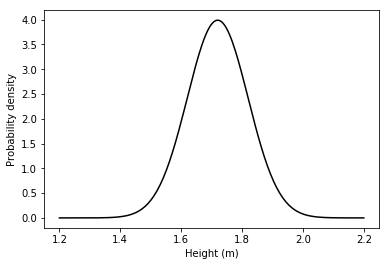

In [2]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# parameters of the distribution of height of men in a country
population_mean = 1.72
population_std = 0.10

# plot the distribution
x = np.linspace(1.2, 2.2, 200)
y = st.norm.pdf(x, loc=population_mean, scale=population_std)
plt.plot(x, y, "k-")
plt.xlabel("Height (m)")
plt.ylabel("Probability density")
plt.show()

Later, we measured the height of the 20 male residents of a village (same age group).

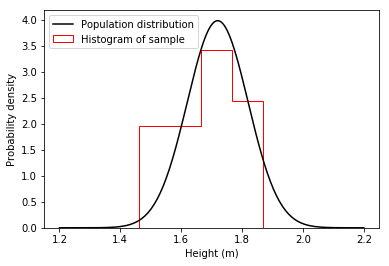

In [3]:
# heights of men in a village
heights = [1.62, 1.53, 1.79, 1.69, 1.79, 
           1.81, 1.61, 1.68, 1.70, 1.87, 
           1.78, 1.46, 1.68, 1.70, 1.51, 
           1.71, 1.53, 1.60, 1.63, 1.67]

plt.plot(x, y, "k-", label="Population distribution")
plt.hist(heights, bins=4, histtype="step", color="r", density=True, label="Histogram of sample")
plt.xlabel("Height (m)")
plt.ylabel("Probability density")
plt.legend()
plt.show()

Although 20 measurements are too few, we noticed that $20\%$ of the men in the village have height less or equal to $1.6m$. Therefore, we can ask:

**Is the height of the men in the village significantly lower than the country's mean value?**

In order to answer we forget about the data, and design a hypothesis test. Only when all parameters are defined, we apply it to the data in order to ensure we're not biased.

### 1. We define the null hypothesis
$H_0$: the mean value of the height of the men is consistent with the population mean

### 2. We decide a significance level

One common choice for the significance level in many fields (medicine, psychology, etc.) is $5\%$. Therefore $a = 0.05$ level at which the Type I error is allowed to occur. If the probability is lower, then we reject the null hypothesis.

### 3. The statistic

In this example, we know the distribution of the population and its parameters. Therefore we can analytically compute the distribution of the mean value of a sample of $20$ people.

The distribution of the sample mean of $N$ values taken from a normally distributed population is itself a normal distribution with the same mean value and standard deviation equal to the so called *standard error of the mean*:

$$SE = \sigma_m = \frac{\sigma}{\sqrt{N}}$$

Therefore, the probability density function (PDF) is:

$$f(m) = \frac{1}{\sqrt{2\pi \sigma_m^2}} \exp\left[-\frac{\left(m - \mu\right)^2}{2\sigma_m^2}\right]$$

Because of the ability to shift and scale the normal distribution, the quantity $Z$:

$$ Z = \frac{m - \mu}{\sigma_m} $$

follows the standard normal distribution (i.e. mean value $0$ and standard deviation $1$). Therefore, by just computing the $Z$ *score*, we can easily use tables of the normal distribution to quickly identify the probability at which $Z$ is below or above a specific value.

We call this $Z$ a *statistic*.

### 4. p-value or, critical value for the statistic

Because of the null hypothesis, the probability of Type I error is equal to the probability that a $Z$ score is lower than the measured value. The function quantifying this is the cumulative density function (CDF). Therefore, the $p$-value is:
$$ p = F(Z) $$

If we find $p < a = 0.05$ then we reject the null hypothesis.

Alternatively, we can set a **critical** value of the $Z$ score that corresponds to the significance level. This is done by inverting the equation:

$$ Z_{\rm crit} = F^{-1}(a) = \Phi^{-1}(0.05) = -1.64 $$


### 5. Decision

Now that we defined all the steps, we can apply it on the data. In the following code, we plot the sample, compute the statistic and print the outcome based on the critical value! Alternatively we could use the p-value, which we print anyway.

In [4]:
z_critical = st.norm.ppf(0.05)
print("Z critical     : {:.3f}".format(z_critical))
print()

sample_mean = np.mean(heights)
standard_error = population_std / (len(heights) ** 0.5)
z_score = (sample_mean - population_mean) / standard_error
print("Sample mean    : {:.3f}".format(sample_mean))
print("Standard error : {:.3f}".format(standard_error))
print("Z score        : {:.3f}".format(z_score))

pvalue = st.norm.cdf(z_score)
print("p-value        : {:.3g}".format(pvalue))
print()

if z_score < z_critical:
    print("We reject the null hypothesis.")
else:
    print("We cannot reject the null hypothesis.")

Z critical     : -1.645

Sample mean    : 1.668
Standard error : 0.022
Z score        : -2.326
p-value        : 0.01

We reject the null hypothesis.


## Common hypothesis tests
During the last three centuries, scientists performed numerous statistical tests. A few of them are encountered very often because they try to answer simple questions on data following known distributions. Others, are generic, parametric-free and therefore, applicable in many circumstances.

### Student's $t$-test

Question: Is the mean value of a sample equal to the population mean?

In [5]:
# population mean
pop_mean = 10.0

# sample
sample = [4, 7, 6, 11, 12]

# test it
statistic, pvalue = st.ttest_1samp(sample, pop_mean)
print("Statistic = {:.3g}".format(statistic))
print("p-value   = {:.3g}".format(pvalue))

Statistic = -1.32
p-value   = 0.258


### Two-sample $t$-test

Question: do indpendent samples $A$ and $B$ have the same expected value?

The `scipy.stats` function `ttest_ind` computes the standard 2-sample t-test. Though it **assumes** that the variance of the two populations is equal. If not, then we use the argument `equal_var`: if set to `False` then the Welch's t-test is used.

In [6]:
# the two samples
sample_A = [4, 7, 6, 11, 12, 10, 5, 4, 20, 31, 10]
sample_B = [16, 18, 7, 13, 13, 21, 7, 15, 22, 34, 22]
equal_variances = False

statistic, pvalue = st.ttest_ind(sample_A, sample_B, equal_var=equal_variances)
print("p-value   = {:.3g}".format(pvalue))

p-value   = 0.0819


### Hypothesis testing and distributions

#### Testing sample against parametric distribution
Sometimes we want to check whether a sample we have follows a common distribution.

#### Shapiro-Wilk test for *normality*

#### Sample vs. Sample

Testing with mean = 0.5, p-value = 1.01e-11
Testing with mean = 3, p-value = 0.0005
Testing with mean = 10, p-value = 0.0832
Testing with mean = 30, p-value = 0.426


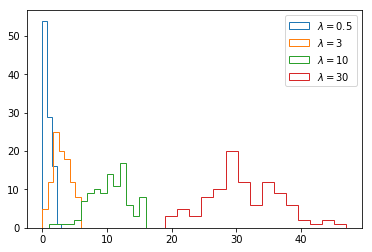

In [7]:
plt.figure()
sample_size = 100
poisson_means_to_test = [0.5, 3, 10, 30]
for poisson_mean in poisson_means_to_test:
    sample = st.poisson.rvs(poisson_mean, size=sample_size)
    statistic, pvalue = st.shapiro(sample)
    print("Testing with mean = {:.3g}, p-value = {:.3g}".format(poisson_mean, pvalue))
    nbins = min(15, max(sample) - min(sample) + 1)
    plt.hist(sample, bins=nbins, label=r"$\lambda = {:.2g}$".format(poisson_mean), histtype="step")
plt.legend()
plt.show()

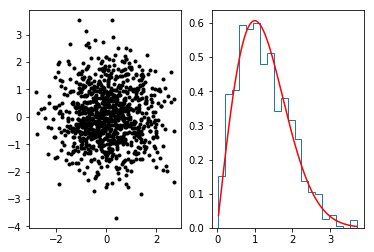

p-value   = 0.174


In [8]:
# KS: sample of vector lengths against Rayleigh distribution
sigma = 1.0
N = 1000
x = np.random.normal(loc=0, scale=sigma, size=N)
y = np.random.normal(loc=0, scale=sigma, size=N)
r = (x ** 2.0 + y ** 2.0) ** 0.5

plt.figure()
plt.subplot(121)
plt.plot(x, y, "k.")
plt.subplot(122)
plt.hist(r, bins=20, histtype="step", density=True)

r_values = np.linspace(min(r), max(r), 200)
plt.plot(r_values, st.rayleigh.pdf(r_values, scale=sigma), "r-")
plt.show()

distribution = st.rayleigh(scale=sigma)
statistic, pvalue = st.kstest(r, distribution.cdf)
print("p-value   = {:.3g}".format(pvalue))

### 2-sample K-S test

If $A \sim \mathcal{N}\left(13, 8\right)$ and $B \sim \mathcal{N}\left(12, 1\right)$ then their sum, $X = A + B$ is also normally distributed with mean value equal to $13 + 12 = 25$ and standard deviation equal to the quadratic sum of the standard deviations (remember error propagation), $\sqrt{8^2 + 1^2} = \sqrt{65}$.

Equivalently, if $C \sim \mathcal{N}\left(30, 7\right)$ and $D \sim \mathcal{N}\left(5, 4\right)$ then their difference, $Y = C - D$ has mean value equal to $30 - 5 = 25$ and standard deviation equal to the quadratic sum $\sqrt{7^2 + 4^2} = \sqrt{65}$.

Therefore, $X \equiv Y \sim \mathcal{N}\left(25, \sqrt{65}\right)$.

We produce samples of $A, B, C$ and $D$, combine them to create samples of $X$ and $Y$ and then we will test whether their distribution is equal, using the 2-sample K-S test.

Using a small sample size, 100, check the p-value. Then change on of the initial samplings (e.g. change the mean value of $D$) by a small amount (e.g. 1). Can you reject the null hypothesis? What happens if you set the sample size to 1000 or 10000?

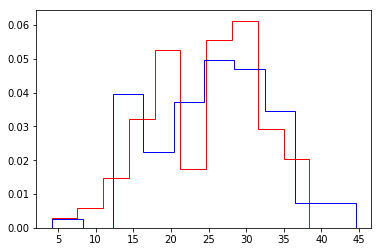

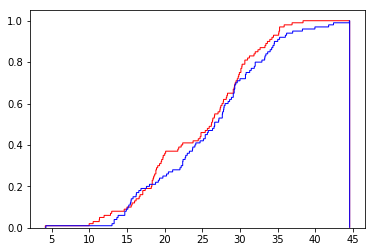

p-value   = 0.443


In [9]:
N = 100
A = np.random.normal(loc=13, scale=8, size=N)
B = np.random.normal(loc=12, scale=1, size=N)
C = np.random.normal(loc=30, scale=7, size=N)
D = np.random.normal(loc=5, scale=4, size=N)

X = A + B
Y = C - D

plt.figure()
plt.hist(X, bins=10, color="r", histtype="step", density=True)
plt.hist(Y, bins=10, color="b", histtype="step", density=True)
plt.show()

plt.figure()
xx = np.linspace(min(min(X), min(Y)), max(max(X), max(Y)), 1000)
plt.hist(X, bins=xx, color="r", histtype="step", density=True, cumulative=True)
plt.hist(Y, bins=xx, color="b", histtype="step", density=True, cumulative=True)
plt.show()

statistic, pvalue = st.ks_2samp(X, Y)
print("p-value   = {:.3g}".format(pvalue))

## Testing for correlations

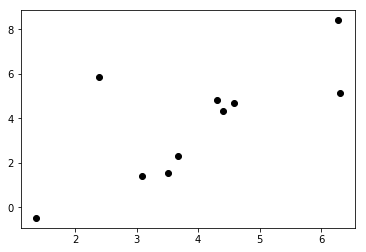

PEARSON  : R =    0.723  |  p-value =   0.0181
SPEARMAN : R =      0.6  |  p-value =   0.0667
KENDALL  : R =    0.556  |  p-value =   0.0253


In [10]:
N = 10
x = np.random.uniform(0, 10, size=N)
a = 1
b = 0
error = 3
y = a * x + b + np.random.normal(loc=0, scale=error, size=N)
plt.figure()
plt.plot(x, y, "ko")
plt.show()

r, pvalue = st.pearsonr(x, y)
print("PEARSON  : R = {:8.3g}  |  p-value = {:8.3g}".format(r, pvalue))

r, pvalue = st.spearmanr(x, y)
print("SPEARMAN : R = {:8.3g}  |  p-value = {:8.3g}".format(r, pvalue))

r, pvalue = st.kendalltau(x, y)
print("KENDALL  : R = {:8.3g}  |  p-value = {:8.3g}".format(r, pvalue))